In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, BatchNormalization, GaussianNoise
from tensorflow.keras import Model, Sequential
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import os

In [2]:
DATA_FILE = "x.npy"
x = np.load(DATA_FILE)

In [3]:
inference_model = keras.models.load_model("inference.h5")
stacked_model = keras.models.load_model("stacked.h5")

In [4]:
cleaner_model = Sequential([
    inference_model,
    Conv2D(12, 5, strides=1, padding="same", activation="selu"),
    Conv2D(3, 3, strides=1, padding="same", activation="sigmoid")
])

cleaner_model.layers[0].trainable = False
cleaner_model.compile(optimizer="adam", loss="MSE")
cleaner_model.summary()
cleaner_model.fit(x[:5000], x[:5000], epochs=10)

inference_model = cleaner_model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_3 (Functional)    (None, 128, 128, 3)       444627    
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 12)      912       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 3)       327       
Total params: 445,866
Trainable params: 1,239
Non-trainable params: 444,627
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 4s 26ms/step - loss: 0.0320
Epoch 2/10
157/157 [==============================] - 4s 26ms/step - loss: 0.0060
Epoch 3/10
157/157 [==============================] - 4s 26ms/step - loss: 0.0048
Epoch 4/10
157/157 [==============================] - 4s 27ms/step - loss: 0.0045
Epoch 5/10
157/157 [============================

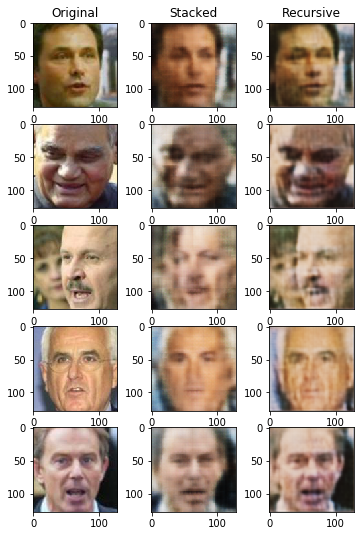

In [5]:
N, _, _, _ = x.shape
num_images = 5
imgs = np.random.randint(0, N, num_images)
display_images = x[imgs, :, :, :]

reconstructions = inference_model.predict(display_images)
basic_reconstructions = stacked_model.predict(display_images)

fig, axs = plt.subplots(5, 3)

titles = ["Original", "Stacked", "Recursive"]

for r, row in enumerate(axs):
    imgs = [display_images[r], basic_reconstructions[r], reconstructions[r]]
    for c, ax in enumerate(row):
        img = imgs[c].astype(float)
        ax.imshow(img)
        if r == 0:
            ax.set_title(titles[c])

fig.set_size_inches(6, 9)
fig.savefig("faces.png")
fig.show()